In [1]:
########## 8 May 2018 - Alec S. Hirschauer ##########
# Today I am going to try to recreate the CMDs and CCDs for NGC 6822 using Python
# (which I had previously made in SuperMongo)
# to simultaneously learn a new plotting language and transfer the plots' utility.
#
# These CMDs and CCDs are from Sewilo et al. (2013) and Whitney et al. (2008),
# and the data come from the catalog of Spitzer sources of Khan et al. (2015)
# matched with IR sources from 2MASS in CasJobs.

In [2]:
# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# And this command is useful for automatically showing plots inline.
%matplotlib inline

In [46]:
# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDparameters27April2018_ahirschauer.csv')
# This is a table of values with ~30,000 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to 2MASS sources with an "OR" command,
# then downloaded from MAST CasJobs.

In [47]:
# Since the .csv file imported above only has the magnitude values,
# I'll need to set the colors used in the CMDs and CCDs.
# I've decided to do this on a per-figure basis, so there will be some duplicates,
# but this will allow me to keep track of it way better.
#
# Colors from Sewilo et al. (2013) Figure 2:
#
phot_data['threesixMINUSfiveeight'] = phot_data.k36mag.values - phot_data.k58mag.values
phot_data['fourfiveMINUSfiveeight'] = phot_data.k45mag.values - phot_data.k58mag.values
phot_data['fourfiveMINUSeightzero'] = phot_data.k45mag.values - phot_data.k80mag.values
phot_data['fourfiveMINUStwentyfour'] = phot_data.k45mag.values - phot_data.k24mag.values
phot_data['eightzeroMINUStwentyfour'] = phot_data.k80mag.values - phot_data.k24mag.values
#
# Colors from Whitney et al. (2008) Figure 2:
#
phot_data['kMINUSfourfive'] = phot_data.kmag.values - phot_data.k45mag.values
phot_data['fourfiveMINUSfiveeight'] = phot_data.k45mag.values - phot_data.k58mag.values
phot_data['threesixMINUSeightzero'] = phot_data.k36mag.values - phot_data.k80mag.values
phot_data['eightzeroMINUStwentyfour'] = phot_data.k80mag.values - phot_data.k24mag.values
#
# Colors from Whitney et al. (2008) Figure 3:
#
phot_data['eightzeroMINUStwentyfour'] = phot_data.k80mag.values - phot_data.k24mag.values
#
phot_data['kMINUSthreesix'] = phot_data.kmag.values - phot_data.k36mag.values
phot_data['kMINUSfourfive'] = phot_data.kmag.values - phot_data.k45mag.values
phot_data['threesixMINUSeightzero'] = phot_data.k36mag.values - phot_data.k80mag.values
phot_data['fourfiveMINUSfiveeight'] = phot_data.k45mag.values - phot_data.k58mag.values
#
phot_data['threesixMINUStwentyfour'] = phot_data.k36mag.values - phot_data.k24mag.values
phot_data['eightzeroMINUStwentyfour'] = phot_data.k80mag.values - phot_data.k24mag.values
phot_data['threesixMINUSfourfive'] = phot_data.k36mag.values - phot_data.k45mag.values
phot_data['fourfiveMINUStwentyfour'] = phot_data.k45mag.values - phot_data.k24mag.values
#
phot_data['fourfiveMINUSeightzero'] = phot_data.k45mag.values - phot_data.k80mag.values
phot_data['fiveeightMINUStwentyfour'] = phot_data.k58mag.values - phot_data.k24mag.values
phot_data['fiveeightMINUSeightzero'] = phot_data.k58mag.values - phot_data.k80mag.values
phot_data['fourfiveMINUSeightzero'] = phot_data.k45mag.values - phot_data.k80mag.values
#
# Colors from Whitney et al. (2008) Figure 4:
#
phot_data['fourfiveMINUSeightzero'] = phot_data.k45mag.values - phot_data.k80mag.values
phot_data['eightzeroMINUStwentyfour'] = phot_data.k80mag.values - phot_data.k24mag.values
phot_data['threesixMINUSfourfive'] = phot_data.k36mag.values - phot_data.k45mag.values
phot_data['fiveeightMINUSeightzero'] = phot_data.k58mag.values - phot_data.k80mag.values
phot_data['threesixMINUSfiveeight'] = phot_data.k36mag.values - phot_data.k58mag.values
#
# Again, I know there are duplicates, but this way I was able to directly compare this
# Python script to the scripts I had already made in SuperMongo (which are independent files).

In [48]:
# In my first iteration of making CMDs, I found a few erroneous color values well in excess of
# the standard plot boundaries, which made the axes ludicrously proportioned.
# While clearly I could simply define the scale of the axes such that these outliers are skipped,
# if I wanted to do any analysis of the dataset as a whole it is more useful for me to trim them.
#
# These erroneous color values were all in the vicinity of +/-10,000, which come from the fact that
# 'null' values in the catalog of photometric sources had been set to "-9999" and therefore a small
# value minus -9,999 becomes roughly 10,000, or -9,999 minus a small value becomes roughly -10,000.
#
# Rather than set individual cuts for every afflicted column (as I had tried to do earlier),
# I am making a global cut of the whole dataframe so that no value is outside of the range
# of -500.0 to +500.0, which hopefully encompasses everything useful (including RA & Dec).
#
phot_data = phot_data[(phot_data < 500.0) & (phot_data > -500.0)]
#
# The above command trims the 'phot_data' dataframe, but later on when I plot and/or analyze the data,
# I'd like to specify that we're dealing with a "filtered" data set, so the command below does that.
#
filter_phot_data = phot_data

In [49]:
# To make sure that the color terms were done properly, as well as to see what they are explicitly
# (since there were so many duplicates from the way I made them in the first place),
# this command simply shows what columns are in the table.
phot_data.columns

Index([u'myid', u'myra', u'mydec', u'jmag', u'jcmsig', u'jmsigcom', u'hmag',
       u'hcmsig', u'hmsigcom', u'kmag', u'kcmsig', u'kmsigcom', u'k36mag',
       u'e36mag', u'k45mag', u'e45mag', u'k58mag', u'e58mag', u'k80mag',
       u'e80mag', u'k24mag', u'e24mag', u'threesixMINUSfiveeight',
       u'fourfiveMINUSfiveeight', u'fourfiveMINUSeightzero',
       u'fourfiveMINUStwentyfour', u'eightzeroMINUStwentyfour',
       u'kMINUSfourfive', u'threesixMINUSeightzero', u'kMINUSthreesix',
       u'threesixMINUStwentyfour', u'threesixMINUSfourfive',
       u'fiveeightMINUStwentyfour', u'fiveeightMINUSeightzero'],
      dtype='object')

In [50]:
# To make sure the data were read in properly and, since the color values had to be added later,
# plus the filter cuts were established in the step above, we can preview the data.
phot_data.head()

,myid,myra,mydec,jmag,jcmsig,jmsigcom,hmag,hcmsig,hmsigcom,kmag,...,fourfiveMINUSeightzero,fourfiveMINUStwentyfour,eightzeroMINUStwentyfour,kMINUSfourfive,threesixMINUSeightzero,kMINUSthreesix,threesixMINUStwentyfour,threesixMINUSfourfive,fiveeightMINUStwentyfour,fiveeightMINUSeightzero
0,1.0,296.37946,-14.74545,10.059,0.022,0.025,9.204,0.021,0.023,8.976,...,-0.40,0.14,0.54,0.036,-0.27,-0.094,0.27,0.13,0.20,-0.34
1,2.0,296.23211,-14.72759,9.986,0.018,0.022,9.383,0.025,0.026,9.225,...,-0.15,-0.04,0.11,0.135,0.10,-0.115,0.21,0.25,0.01,-0.10
2,3.0,296.31297,-14.77366,10.317,0.017,0.021,9.490,0.023,0.025,9.256,...,0.01,0.27,0.26,-0.094,0.14,-0.224,0.40,0.13,0.08,-0.18
3,4.0,296.32372,-14.71925,10.281,0.020,0.023,9.592,0.026,0.027,9.403,...,-0.22,0.07,0.29,0.033,-0.13,-0.057,0.16,0.09,0.03,-0.26
4,5.0,296.13722,-14.94461,9.999,0.021,0.025,9.734,0.019,0.021,9.625,...,-0.33,0.02,0.35,0.235,0.05,-0.145,0.40,0.38,0.17,-0.18


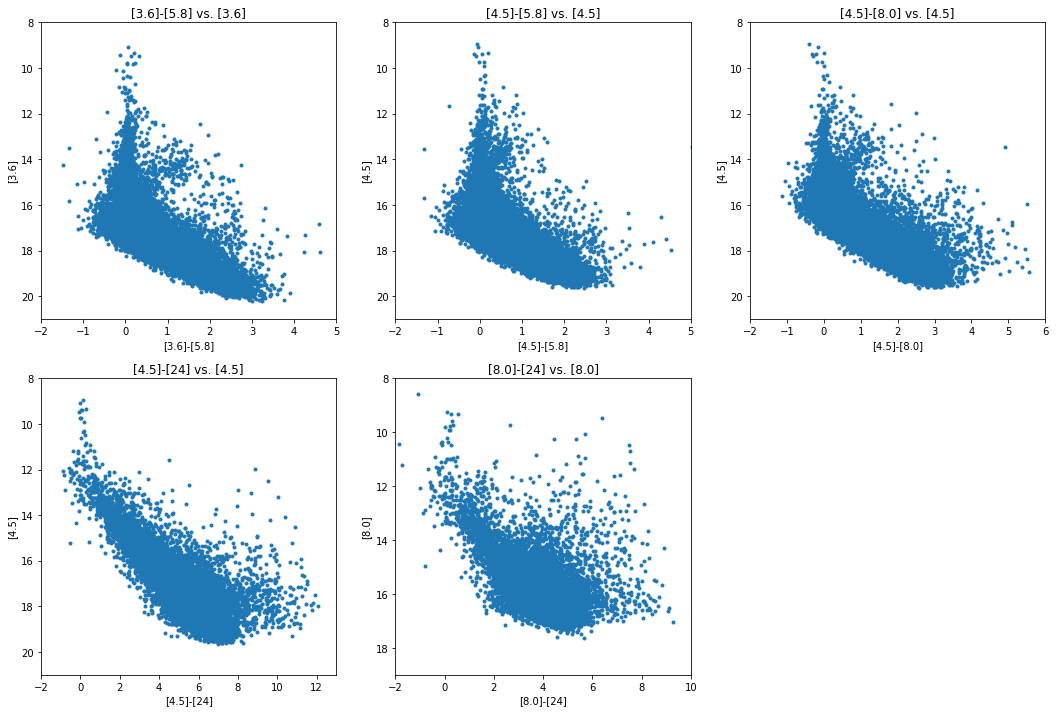

In [52]:
# The plots can be made one at a time or in groups (as I had done before).
# For now I'll recreate the grouped plots.
#
# Plots of Sewilo et al. (2013) Figure 2:
#
plt.figure(figsize=(18,12))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
#
ax1.set_ylim(21.0,8.0)
ax1.set_xlim(-2.0,5.0)
ax1.plot(filter_phot_data.threesixMINUSfiveeight,filter_phot_data.k36mag,'.')
ax1.set_ylabel('[3.6]')
ax1.set_xlabel('[3.6]-[5.8]')
ax1.set_title('[3.6]-[5.8] vs. [3.6]')
#
ax2.set_ylim(21.0,8.0)
ax2.set_xlim(-2.0,5.0)
ax2.plot(filter_phot_data.fourfiveMINUSfiveeight,filter_phot_data.k45mag,'.')
ax2.set_ylabel('[4.5]')
ax2.set_xlabel('[4.5]-[5.8]')
ax2.set_title('[4.5]-[5.8] vs. [4.5]')
#
ax3.set_ylim(21.0,8.0)
ax3.set_xlim(-2.0,6.0)
ax3.plot(filter_phot_data.fourfiveMINUSeightzero,filter_phot_data.k45mag,'.')
ax3.set_ylabel('[4.5]')
ax3.set_xlabel('[4.5]-[8.0]')
ax3.set_title('[4.5]-[8.0] vs. [4.5]')
#
ax4.set_ylim(21.0,8.0)
ax4.set_xlim(-2.0,13.0)
ax4.plot(filter_phot_data.fourfiveMINUStwentyfour,filter_phot_data.k45mag,'.')
ax4.set_ylabel('[4.5]')
ax4.set_xlabel('[4.5]-[24]')
ax4.set_title('[4.5]-[24] vs. [4.5]')
#
ax5.set_ylim(19.0,8.0)
ax5.set_xlim(-2.0,10.0)
ax5.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k80mag,'.')
ax5.set_ylabel('[8.0]')
ax5.set_xlabel('[8.0]-[24]')
ax5.set_title('[8.0]-[24] vs. [8.0]')
#

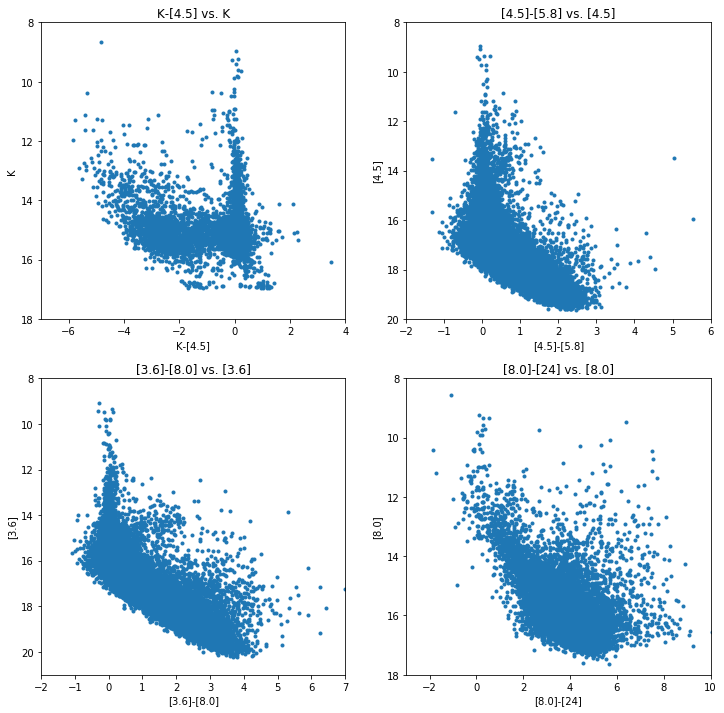

In [56]:
# Plots of Whitney et al. (2008) Figure 2:
#
plt.figure(figsize=(12,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
#
ax1.set_ylim(18.0,8.0)
ax1.set_xlim(-7.0,4.0)
ax1.plot(filter_phot_data.kMINUSfourfive,filter_phot_data.kmag,'.')
ax1.set_ylabel('K')
ax1.set_xlabel('K-[4.5]')
ax1.set_title('K-[4.5] vs. K')
#
ax2.set_ylim(20.0,8.0)
ax2.set_xlim(-2.0,6.0)
ax2.plot(filter_phot_data.fourfiveMINUSfiveeight,filter_phot_data.k45mag,'.')
ax2.set_ylabel('[4.5]')
ax2.set_xlabel('[4.5]-[5.8]')
ax2.set_title('[4.5]-[5.8] vs. [4.5]')
#
ax3.set_ylim(21.0,8.0)
ax3.set_xlim(-2.0,7.0)
ax3.plot(filter_phot_data.threesixMINUSeightzero,filter_phot_data.k36mag,'.')
ax3.set_ylabel('[3.6]')
ax3.set_xlabel('[3.6]-[8.0]')
ax3.set_title('[3.6]-[8.0] vs. [3.6]')
#
ax4.set_ylim(18.0,8.0)
ax4.set_xlim(-3.0,10.0)
ax4.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k80mag,'.')
ax4.set_ylabel('[8.0]')
ax4.set_xlabel('[8.0]-[24]')
ax4.set_title('[8.0]-[24] vs. [8.0]')

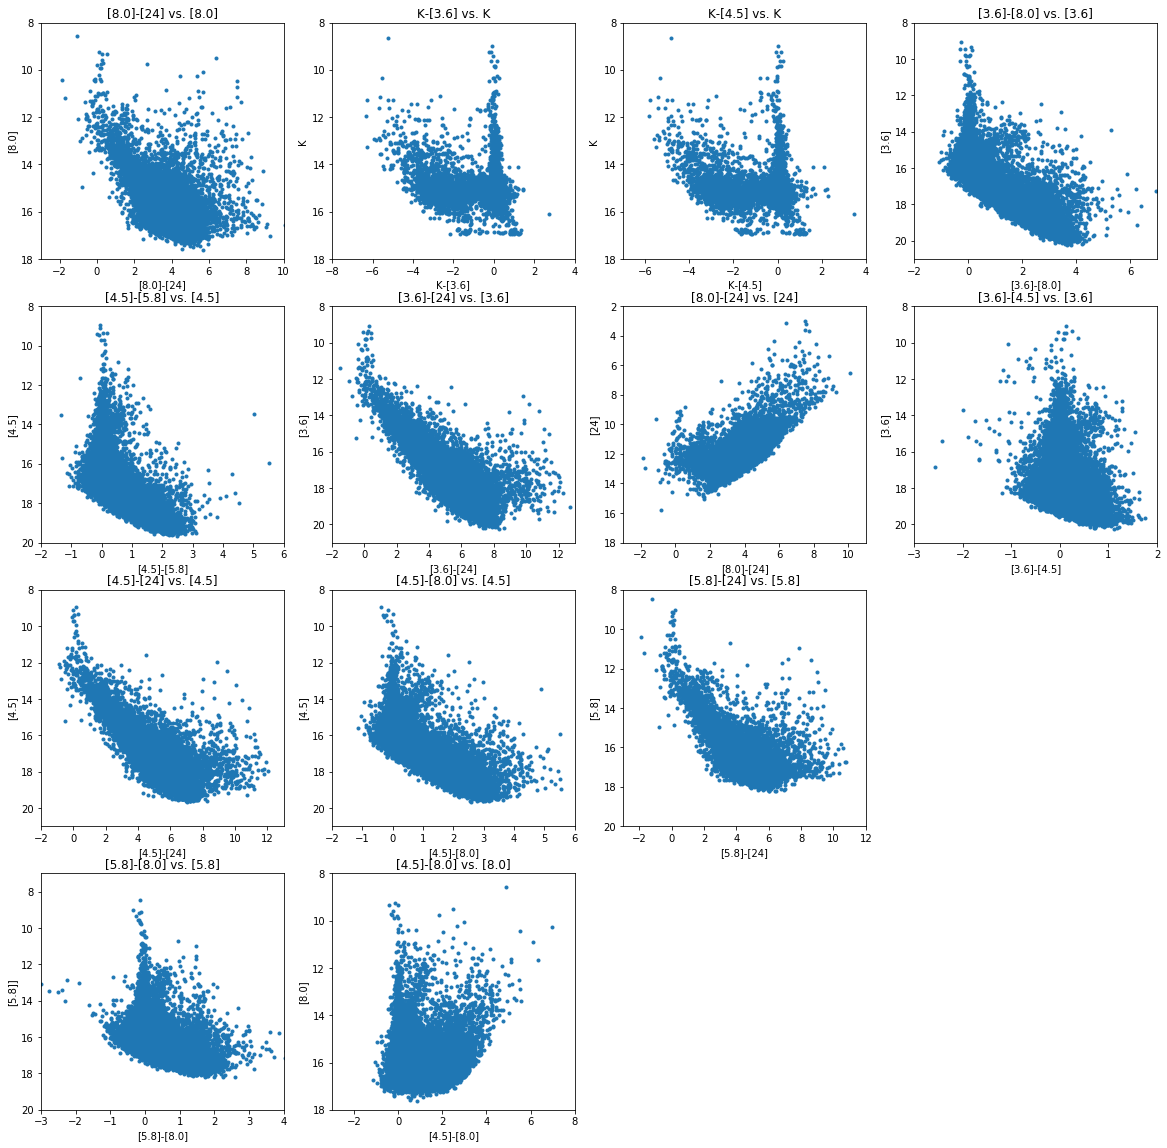

In [72]:
# Plots of Whitney et al. (2008) Figure 3:
#
plt.figure(figsize=(20,20))
ax1 = plt.subplot(441)
ax2 = plt.subplot(442)
ax3 = plt.subplot(443)
ax4 = plt.subplot(444)
ax5 = plt.subplot(445)
ax6 = plt.subplot(446)
ax7 = plt.subplot(447)
ax8 = plt.subplot(448)
ax9 = plt.subplot(449)
ax10 = plt.subplot(4,4,10)
ax11 = plt.subplot(4,4,11)
ax12 = plt.subplot(4,4,13)
ax13 = plt.subplot(4,4,14)
# NB: The commas are necessary in the last four entries to signify not using four-digit numbers.
#
ax1.set_ylim(18.0,8.0)
ax1.set_xlim(-3.0,10.0)
ax1.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k80mag,'.')
ax1.set_ylabel('[8.0]')
ax1.set_xlabel('[8.0]-[24]')
ax1.set_title('[8.0]-[24] vs. [8.0]')
#
ax2.set_ylim(18.0,8.0)
ax2.set_xlim(-8.0,4.0)
ax2.plot(filter_phot_data.kMINUSthreesix,filter_phot_data.kmag,'.')
ax2.set_ylabel('K')
ax2.set_xlabel('K-[3.6]')
ax2.set_title('K-[3.6] vs. K')
#
ax3.set_ylim(18.0,8.0)
ax3.set_xlim(-7.0,4.0)
ax3.plot(filter_phot_data.kMINUSfourfive,filter_phot_data.kmag,'.')
ax3.set_ylabel('K')
ax3.set_xlabel('K-[4.5]')
ax3.set_title('K-[4.5] vs. K')
#
ax4.set_ylim(21.0,8.0)
ax4.set_xlim(-2.0,7.0)
ax4.plot(filter_phot_data.threesixMINUSeightzero,filter_phot_data.k36mag,'.')
ax4.set_ylabel('[3.6]')
ax4.set_xlabel('[3.6]-[8.0]')
ax4.set_title('[3.6]-[8.0] vs. [3.6]')
#
ax5.set_ylim(20.0,8.0)
ax5.set_xlim(-2.0,6.0)
ax5.plot(filter_phot_data.fourfiveMINUSfiveeight,filter_phot_data.k45mag,'.')
ax5.set_ylabel('[4.5]')
ax5.set_xlabel('[4.5]-[5.8]')
ax5.set_title('[4.5]-[5.8] vs. [4.5]')
#
ax6.set_ylim(21.0,8.0)
ax6.set_xlim(-2.0,13.0)
ax6.plot(filter_phot_data.threesixMINUStwentyfour,filter_phot_data.k36mag,'.')
ax6.set_ylabel('[3.6]')
ax6.set_xlabel('[3.6]-[24]')
ax6.set_title('[3.6]-[24] vs. [3.6]')
#
ax7.set_ylim(18.0,2.0)
ax7.set_xlim(-3.0,11.0)
ax7.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k24mag,'.')
ax7.set_ylabel('[24]')
ax7.set_xlabel('[8.0]-[24]')
ax7.set_title('[8.0]-[24] vs. [24]')
#
ax8.set_ylim(21.0,8.0)
ax8.set_xlim(-3.0,2.0)
ax8.plot(filter_phot_data.threesixMINUSfourfive,filter_phot_data.k36mag,'.')
ax8.set_ylabel('[3.6]')
ax8.set_xlabel('[3.6]-[4.5]')
ax8.set_title('[3.6]-[4.5] vs. [3.6]')
#
ax9.set_ylim(21.0,8.0)
ax9.set_xlim(-2.0,13.0)
ax9.plot(filter_phot_data.fourfiveMINUStwentyfour,filter_phot_data.k45mag,'.')
ax9.set_ylabel('[4.5]')
ax9.set_xlabel('[4.5]-[24]')
ax9.set_title('[4.5]-[24] vs. [4.5]')
#
ax10.set_ylim(21.0,8.0)
ax10.set_xlim(-2.0,6.0)
ax10.plot(filter_phot_data.fourfiveMINUSeightzero,filter_phot_data.k45mag,'.')
ax10.set_ylabel('[4.5]')
ax10.set_xlabel('[4.5]-[8.0]')
ax10.set_title('[4.5]-[8.0] vs. [4.5]')
#
ax11.set_ylim(20.0,8.0)
ax11.set_xlim(-3.0,12.0)
ax11.plot(filter_phot_data.fiveeightMINUStwentyfour,filter_phot_data.k58mag,'.')
ax11.set_ylabel('[5.8]')
ax11.set_xlabel('[5.8]-[24]')
ax11.set_title('[5.8]-[24] vs. [5.8]')
#
ax12.set_ylim(20.0,7.0)
ax12.set_xlim(-3.0,4.0)
ax12.plot(filter_phot_data.fiveeightMINUSeightzero,filter_phot_data.k58mag,'.')
ax12.set_ylabel('[5.8]]')
ax12.set_xlabel('[5.8]-[8.0]')
ax12.set_title('[5.8]-[8.0] vs. [5.8]')
#
ax13.set_ylim(18.0,8.0)
ax13.set_xlim(-3.0,8.0)
ax13.plot(filter_phot_data.fourfiveMINUSeightzero,filter_phot_data.k80mag,'.')
ax13.set_ylabel('[8.0]')
ax13.set_xlabel('[4.5]-[8.0]')
ax13.set_title('[4.5]-[8.0] vs. [8.0]')

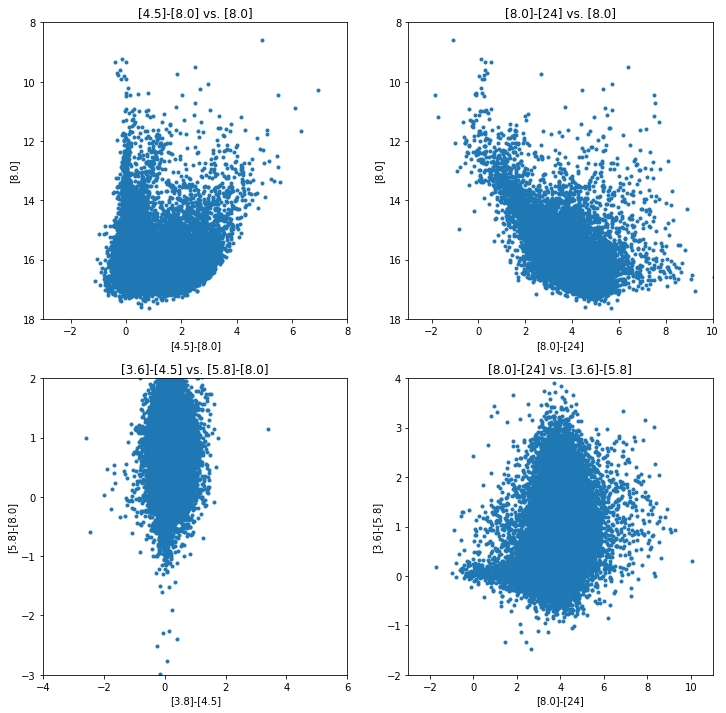

In [74]:
# Plots from Whitney et al. (2008) Figure 3:
#
plt.figure(figsize=(12,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
#
ax1.set_ylim(18.0,8.0)
ax1.set_xlim(-3.0,8.0)
ax1.plot(filter_phot_data.fourfiveMINUSeightzero,filter_phot_data.k80mag,'.')
ax1.set_ylabel('[8.0]')
ax1.set_xlabel('[4.5]-[8.0]')
ax1.set_title('[4.5]-[8.0] vs. [8.0]')
#
ax2.set_ylim(18.0,8.0)
ax2.set_xlim(-3.0,10.0)
ax2.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k80mag,'.')
ax2.set_ylabel('[8.0]')
ax2.set_xlabel('[8.0]-[24]')
ax2.set_title('[8.0]-[24] vs. [8.0]')
#
ax3.set_ylim(-3.0,2.0)
ax3.set_xlim(-4.0,6.0)
ax3.plot(filter_phot_data.threesixMINUSfourfive,filter_phot_data.fiveeightMINUSeightzero,'.')
ax3.set_ylabel('[5.8]-[8.0]')
ax3.set_xlabel('[3.8]-[4.5]')
ax3.set_title('[3.6]-[4.5] vs. [5.8]-[8.0]')
#
ax4.set_ylim(-2.0,4.0)
ax4.set_xlim(-3.0,11.0)
ax4.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.threesixMINUSfiveeight,'.')
ax4.set_ylabel('[3.6]-[5.8]')
ax4.set_xlabel('[8.0]-[24]')
ax4.set_title('[8.0]-[24] vs. [3.6]-[5.8]')